<a href="https://colab.research.google.com/github/ogut77/DataScience/blob/main/BoostingRFDTRegressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import lightgbm as lgb

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from pandas import DataFrame
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


df = pd.read_csv("https://raw.githubusercontent.com/ogut77/DataScience/main/data/BostonHousing.csv")


In [14]:
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [46]:
import warnings
warnings.filterwarnings("ignore")
y = df.medv
x = df.drop('medv', axis=1)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=5)


In [47]:
def evalmetric(y,ypred):
 import numpy as np
 e = y - ypred
 mse_f = np.mean(e**2)
 rmse_f = np.sqrt(mse_f)
 mae_f = np.mean(abs(e))
 mape_f = 100*np.mean(abs(e/y))
 r2_f = 1-(sum(e**2)/sum((y-np.mean(y))**2))
 print("MSE:", mse_f)
 print("RMSE:", rmse_f)
 print("MAE:",mae_f)
 print("MAPE:",mape_f)
 print("R-Squared:", r2_f)

In [49]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state=5)
dtr.fit(X_train,y_train)
## Predicting for training data
print('Train Data')
y_pred = dtr.predict(X_train)
evalmetric(y_train,y_pred)
print('Test Data')
y_pred2 = dtr.predict(X_test)
evalmetric(y_test,y_pred2)

Train Data
MSE: 0.0
RMSE: 0.0
MAE: 0.0
MAPE: 0.0
R-Squared: 1.0
Test Data
MSE: 29.49676470588235
RMSE: 5.431092404469137
MAE: 3.055882352941176
MAPE: 15.487610823159242
R-Squared: 0.62325575177197


In [50]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(random_state=5)
rfr.fit(X_train,y_train)
## Predicting for training data
print('Train Data')
y_pred = rfr.predict(X_train)
evalmetric(y_train,y_pred)
print('Test Data')
y_pred2 = rfr.predict(X_test)
evalmetric(y_test,y_pred2)

Train Data
MSE: 1.4753578811881203
RMSE: 1.2146431085665124
MAE: 0.8167871287128715
MAPE: 4.283704283353454
R-Squared: 0.9828250439399356
Test Data
MSE: 11.343304745098038
RMSE: 3.367982295840944
MAE: 2.2495882352941172
MAPE: 12.217146851961408
R-Squared: 0.855118862654074


In [51]:
from sklearn.ensemble import GradientBoostingRegressor
from time import time

gbr = GradientBoostingRegressor(random_state=5)
gbr.fit(X_train, y_train)
print('Train Data')
y_pred = gbr.predict(X_train)
evalmetric(y_train,y_pred)
print('Test Data')
y_pred2 = gbr.predict(X_test)
evalmetric(y_test,y_pred2)

Train Data
MSE: 1.8932814816593
RMSE: 1.3759656542440657
MAE: 1.09514690693163
MAPE: 5.736529851475533
R-Squared: 0.9779599060868908
Test Data
MSE: 9.514455033587492
RMSE: 3.08455102625771
MAE: 1.9923692196867757
MAPE: 10.879581462293823
R-Squared: 0.8784776484922945


In [52]:
# fit model no training data
from xgboost import XGBRegressor
xgr = XGBRegressor(random_state=5)
xgr.fit(X_train, y_train)
print('Train Data')
y_pred = xgr.predict(X_train)
evalmetric(y_train,y_pred)
print('Test Data')
y_pred2 = xgr.predict(X_test)
evalmetric(y_test,y_pred2)

Train Data
MSE: 0.00020630069758811786
RMSE: 0.01436317157135282
MAE: 0.009723323406559419
MAPE: 0.050356873214979926
R-Squared: 0.9999975984095375
Test Data
MSE: 9.810971219511716
RMSE: 3.1322469920987577
MAE: 2.143903751934276
MAPE: 11.291434980288354
R-Squared: 0.8746904274642479


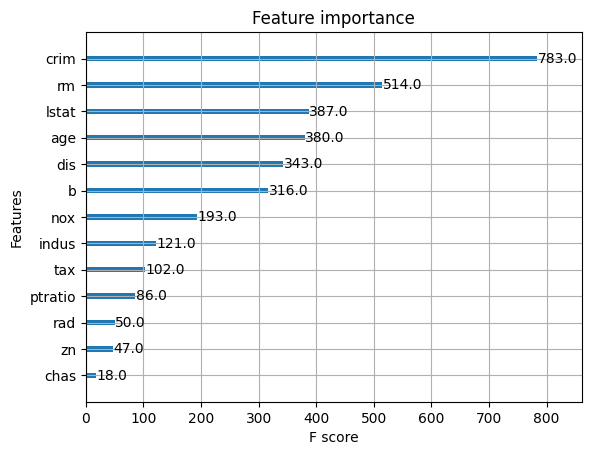

In [53]:
from xgboost import plot_importance
from matplotlib import pyplot
# plot feature importance
plot_importance(xgr)
pyplot.show()

In [26]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 9.5 MB/s eta 0:00:00


In [54]:
import catboost as cb
cat = cb.CatBoostRegressor(random_state=5)
cat.fit(X_train, y_train)
print('Train Data')
y_predcat = cat.predict(X_train)
evalmetric(y_train,y_predcat)
print('Test Data')
y_predcat2 = xgr.predict(X_test)
evalmetric(y_test,y_predcat2)

Learning rate set to 0.03548
0:	learn: 9.1049114	total: 2.91ms	remaining: 2.91s
1:	learn: 8.9012029	total: 4.78ms	remaining: 2.39s
2:	learn: 8.7456482	total: 7.25ms	remaining: 2.41s
3:	learn: 8.5474729	total: 10.6ms	remaining: 2.64s
4:	learn: 8.3742215	total: 18.6ms	remaining: 3.71s
5:	learn: 8.2380083	total: 22.1ms	remaining: 3.66s
6:	learn: 8.0623931	total: 28.4ms	remaining: 4.03s
7:	learn: 7.8950065	total: 34ms	remaining: 4.22s
8:	learn: 7.7249556	total: 39.7ms	remaining: 4.37s
9:	learn: 7.5659502	total: 44.8ms	remaining: 4.44s
10:	learn: 7.4238421	total: 50.5ms	remaining: 4.54s
11:	learn: 7.2702850	total: 65.2ms	remaining: 5.37s
12:	learn: 7.1502829	total: 74.5ms	remaining: 5.66s
13:	learn: 7.0092082	total: 92ms	remaining: 6.48s
14:	learn: 6.8764793	total: 97.7ms	remaining: 6.42s
15:	learn: 6.7568659	total: 104ms	remaining: 6.41s
16:	learn: 6.6278132	total: 112ms	remaining: 6.46s
17:	learn: 6.5043599	total: 117ms	remaining: 6.37s
18:	learn: 6.3917505	total: 122ms	remaining: 6.29s
1

In [55]:
from time import time
import lightgbm as lgb
t0 = time()
lgr = lgb.LGBMRegressor(random_state=17)
lgr.fit(X_train, y_train)
print('Train Data')
y_pred = lgr.predict(X_train)
evalmetric(y_train,y_pred)
print('Test Data')
y_pred2 = lgr.predict(X_test)
evalmetric(y_test,y_pred2)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000102 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1027
[LightGBM] [Info] Number of data points in the train set: 404, number of used features: 13
[LightGBM] [Info] Start training from score 22.646782
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 